# <span style="color:blue">CRM CASE</span>

## Machine Learning Part 1

### Correlation-K-Means

In [50]:
from sql import get_target
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.cluster import KMeans
import sklearn.metrics as sm

In [2]:
data = get_target()

database successfully connected


In [3]:
data.head()

,customer_age,order_amount_6,basket_average_6,frequency_6,customer_order_3_diff_month,customer_only_electronic_3,customer_first_only_book_later_diff_3,customer_basket_median_greater_3,target
0,72.0,951.69,237.922500,4.0,0,0,0,0,0
1,70.0,162.70,162.700000,1.0,0,0,0,0,0
2,72.0,1232.24,154.030000,8.0,0,0,0,0,0
3,25.0,1363.88,175.197777,7.0,0,0,0,0,0
4,72.0,829.00,829.000000,1.0,0,1,0,1,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19692 entries, 0 to 19691
Data columns (total 9 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customer_age                           19690 non-null  float64
 1   order_amount_6                         19692 non-null  float64
 2   basket_average_6                       19692 non-null  float64
 3   frequency_6                            19691 non-null  float64
 4   customer_order_3_diff_month            19692 non-null  int64  
 5   customer_only_electronic_3             19692 non-null  int64  
 6   customer_first_only_book_later_diff_3  19692 non-null  int64  
 7   customer_basket_median_greater_3       19692 non-null  int64  
 8   target                                 19692 non-null  int64  
dtypes: float64(4), int64(5)
memory usage: 1.4 MB


In [5]:
data.describe()

,customer_age,order_amount_6,basket_average_6,frequency_6,customer_order_3_diff_month,customer_only_electronic_3,customer_first_only_book_later_diff_3,customer_basket_median_greater_3,target
count,19690.000000,19692.000000,19692.000000,19691.000000,19692.000000,19692.000000,19692.000000,19692.000000,19692.000000
mean,31.757593,1108.391702,598.878528,1.887817,0.013711,0.107759,0.004824,0.499949,0.127260
std,26.928388,4066.920133,2038.489081,2.432608,0.116292,0.310084,0.069291,0.500013,0.333272
min,0.000000,-89.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,209.780000,192.922917,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,28.000000,373.335000,261.143333,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,60.000000,800.132500,429.992500,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,72.000000,164814.980000,90980.000000,89.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
data.corr(method='pearson')

,customer_age,order_amount_6,basket_average_6,frequency_6,customer_order_3_diff_month,customer_only_electronic_3,customer_first_only_book_later_diff_3,customer_basket_median_greater_3,target
customer_age,1.000000,-0.041096,-0.085745,0.144673,0.030221,-0.109795,0.007568,-0.010281,-0.101873
order_amount_6,-0.041096,1.000000,0.613882,0.394044,0.297372,0.214722,0.167280,0.197727,0.256019
basket_average_6,-0.085745,0.613882,1.000000,-0.021687,0.019751,0.351132,0.017508,0.208432,0.340302
frequency_6,0.144673,0.394044,-0.021687,1.000000,0.362510,-0.063217,0.174046,0.083819,0.001449
customer_order_3_diff_month,0.030221,0.297372,0.019751,0.362510,1.000000,-0.022667,0.143048,0.065515,0.036218
customer_only_electronic_3,-0.109795,0.214722,0.351132,-0.063217,-0.022667,1.000000,-0.024197,0.245039,0.910089
customer_first_only_book_later_diff_3,0.007568,0.167280,0.017508,0.174046,0.143048,-0.024197,1.000000,0.056440,0.182332
customer_basket_median_greater_3,-0.010281,0.197727,0.208432,0.083819,0.065515,0.245039,0.056440,1.000000,0.267005
target,-0.101873,0.256019,0.340302,0.001449,0.036218,0.910089,0.182332,0.267005,1.000000


Text(32.093749999999986, 0.5, '')

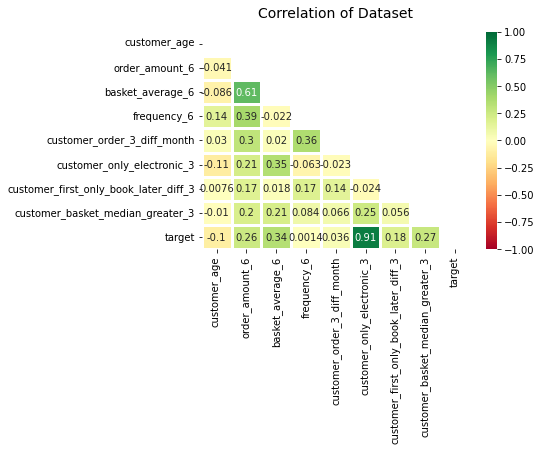

In [10]:

corr_df = data.corr(method='pearson')
corr_df.head().reset_index()
mask = np.zeros_like(corr_df)
mask[np.triu_indices_from(mask)] = True
heatmap = sns.heatmap(corr_df, cmap='RdYlGn', vmax=1.0, vmin=-1.0 , mask = mask, linewidths=2.5, annot=True)
plt.yticks(rotation=0)
plt.xticks(rotation=90)
heatmap.set_title('Correlation of Dataset', fontdict={'fontsize':14}, pad=14)
heatmap.set_xlabel('')
heatmap.set_ylabel('')

In [16]:
data_ml = data[["order_amount_6", "basket_average_6", "customer_only_electronic_3", "customer_basket_median_greater_3", "target"]]

In [19]:
data_ml.head()

,order_amount_6,basket_average_6,customer_only_electronic_3,customer_basket_median_greater_3,target
0,951.69,237.922500,0,0,0
1,162.70,162.700000,0,0,0
2,1232.24,154.030000,0,0,0
3,1363.88,175.197777,0,0,0
4,829.00,829.000000,1,1,1


In [21]:
scaler = preprocessing.MinMaxScaler()
scaler.fit(data_ml)
scaled = scaler.fit_transform(data_ml)
scaled_df = pd.DataFrame(scaled, columns=data_ml.columns)

In [22]:
scaled_df.head()

,order_amount_6,basket_average_6,customer_only_electronic_3,customer_basket_median_greater_3,target
0,0.006311,0.002615,0.0,0.0,0.0
1,0.001527,0.001788,0.0,0.0,0.0
2,0.008013,0.001693,0.0,0.0,0.0
3,0.008811,0.001926,0.0,0.0,0.0
4,0.005567,0.009112,1.0,1.0,1.0


In [42]:
x = data_ml[["order_amount_6", "basket_average_6", "customer_only_electronic_3", "customer_basket_median_greater_3"]]
x.columns = ["order_amount_6", "basket_average_6", "customer_only_electronic_3", "customer_basket_median_greater_3"]

y = data_ml["target"]
y.columns = ["target"]

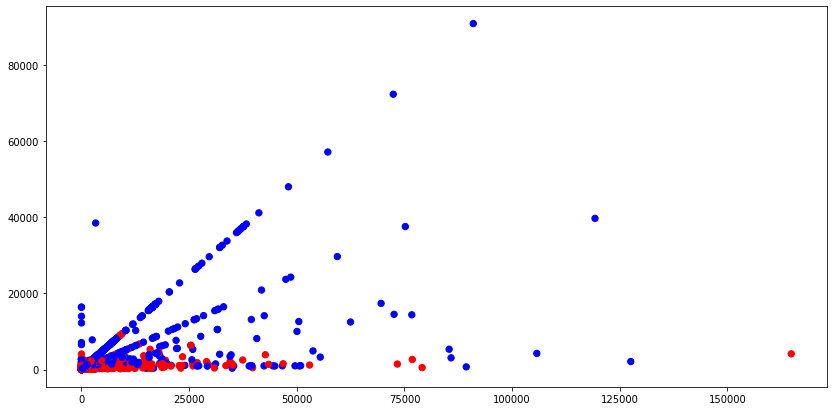

In [46]:
plt.figure(figsize=(14,7))
 
colormap = np.array(['red', 'blue'])

plt.scatter(x.order_amount_6, x.basket_average_6, c=colormap[y], s=40)

Text(0.5, 1.0, 'K Mean Sınıflandırması')

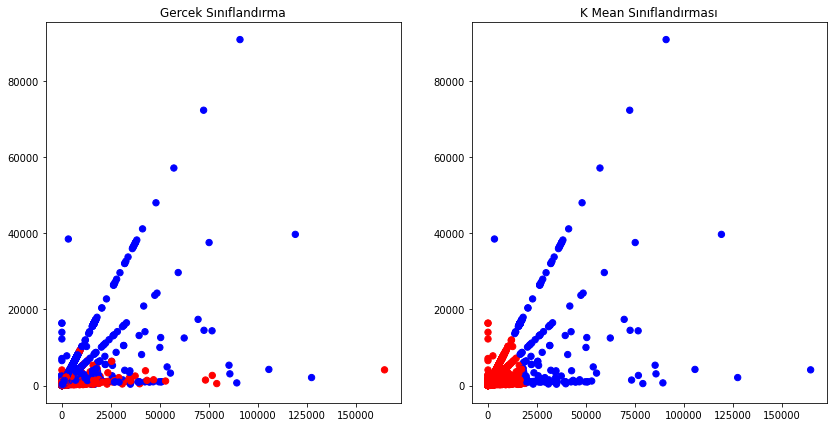

In [49]:
model = KMeans(n_clusters=2)
model.fit(x)

predY = np.choose(model.labels_, [0, 1]).astype(np.int64)

plt.figure(figsize=(14,7))
 
colormap = np.array(['red', 'blue'])

plt.subplot(1, 2, 1)
plt.scatter(x.order_amount_6, x.basket_average_6, c=colormap[y], s=40)
plt.title('Gercek Sınıflandırma')
plt.subplot(1, 2, 2)
plt.scatter(x.order_amount_6, x.basket_average_6, c=colormap[predY], s=40)
plt.title('K Mean Sınıflandırması')

In [51]:
sm.accuracy_score(y, predY)

0.8795957749339833